# __Desafío - Árboles de regresión__

## Requerimientos
- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en
la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran
número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de
inmuebles, medidos con la variable `Sale_Price`.


## Ejercicio 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la
clase `DecisionTreeRegressor`.
- De manera adicional importe las funciones y clases necesarias para generar un
desempeño de métricas en problemas de regresión, división de muestras y búsqueda de
grilla con validación cruzada.
- Elimine la columna `'Unnamed: 0'` cuando cargue los datos.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [3]:
df = pd.read_csv('ames_housing.csv').drop(columns=['Unnamed: 0'])

In [4]:
df['Sale_Price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

## Ejercicio 2: Feature engineering
- Identifique si el `dtype` de cada `pd.Serie` en nuestra base de datos se considera
`'object'` o no. Para todas las variables que sean `'object'`, realice lo siguiente:
  - Genere una recodificación $k − 1$ en cada variable. Para efectos prácticos sólo
necesitan eliminar una de las categorías, no se concentren en especificar la
categoría a eliminar. Pueden utilizar la función con la opción `drop_first` para
ello.
  - Utilizando el método `pd.concat`, concatene a los atributos creados en la base de
  datos.
  
  __Tip:__ No se olvide de eliminar los atributos recodificados, de esta forma evitará un
  aumento artificial del desempeño del modelo.


In [5]:
refactoredDf = df.copy()
for col, dtype in df.dtypes.iteritems():
    if dtype == 'object':
        dummies = pd.get_dummies(refactoredDf[col], prefix=col, drop_first=True)
        refactoredDf = pd.concat([refactoredDf, dummies], axis=1).drop(columns=[col])
refactoredDf.head(5)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


## Ejercicio 3: Primer modelo
- Genere muestras de entrenamiento y validación con `'Sale_Price'` como vector
objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla
pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin
modificar los hiper parámetros. Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.

In [15]:
# Generamos el arreglo con columnas
trainColumns = list(filter(lambda x: x != 'Sale_Price', refactoredDf.columns))
# Generamos las muestras de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(refactoredDf.loc[:, trainColumns], refactoredDf['Sale_Price'], test_size=.33, random_state=19137)
# Generamos el modelo
model = DecisionTreeRegressor(random_state=19137).fit(X_train, y_train)
# Generamos las predicciones
y_hat = model.predict(X_test)
# Analizamos las métricas
print(f'MSE: {mean_squared_error(y_test, y_hat)}')
print(f'MAE: {median_absolute_error(y_test, y_hat)}')
print(f'R2 Score: {r2_score(y_test, y_hat)}')


MSE: 1725866452.417787
MAE: 16000.0
R2 Score: 0.735495745992901


Vemos que el modelo tiene un alto MSE, lo que indica una alta sobreestimación por parte del modelo. Sin embargo se tiene un R2 alto, explicando el 73% de la muestra.

In [7]:
model.feature_importances_


array([2.65209052e-03, 9.18518607e-03, 5.64214235e-02, 7.08054114e-03,
       1.60582680e-03, 4.06619349e-03, 1.32351644e-03, 1.03436004e-02,
       9.12917742e-02, 5.34513788e-02, 3.38641318e-03, 3.55602717e-05,
       1.99484195e-01, 5.37302048e-04, 3.18891465e-04, 2.50249855e-04,
       7.45228286e-04, 4.15160407e-03, 1.11470757e-04, 2.60871193e-03,
       2.60876186e-03, 3.87647573e-01, 4.61328973e-03, 9.11210125e-03,
       3.59045871e-03, 3.10796549e-04, 0.00000000e+00, 6.29030874e-04,
       1.34598070e-06, 6.83542838e-06, 1.30806069e-02, 8.06835064e-04,
       1.54864901e-02, 4.84128230e-03, 1.80497275e-05, 1.05706972e-05,
       4.03794210e-08, 0.00000000e+00, 3.38919017e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.17683275e-07,
       1.26914502e-05, 3.93764018e-05, 2.78061364e-03, 1.00948552e-06,
       0.00000000e+00, 0.00000000e+00, 3.75368141e-05, 0.00000000e+00,
       0.00000000e+00, 6.43707940e-05, 2.74448724e-05, 0.00000000e+00,
      

## Ejercicio 4: Importancia relativa
- Implemente el método `plot_importance` utilizado en la lectura para reportar la
importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de
`Sale_Price`.
- Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.


In [8]:
# Traemos el método de la lectura y le hacemos mejoras
def plot_importance(fit_model, feat_names, number = 50, size=(20, 15), plot=True):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    if plot:
        plt.figure(figsize=size)
        plt.title("Feature importance")
        plt.barh(range(number), tmp_importance[sort_importance[:number]])
        plt.yticks(range(number), names[:number], rotation=0)
    return names[:number]

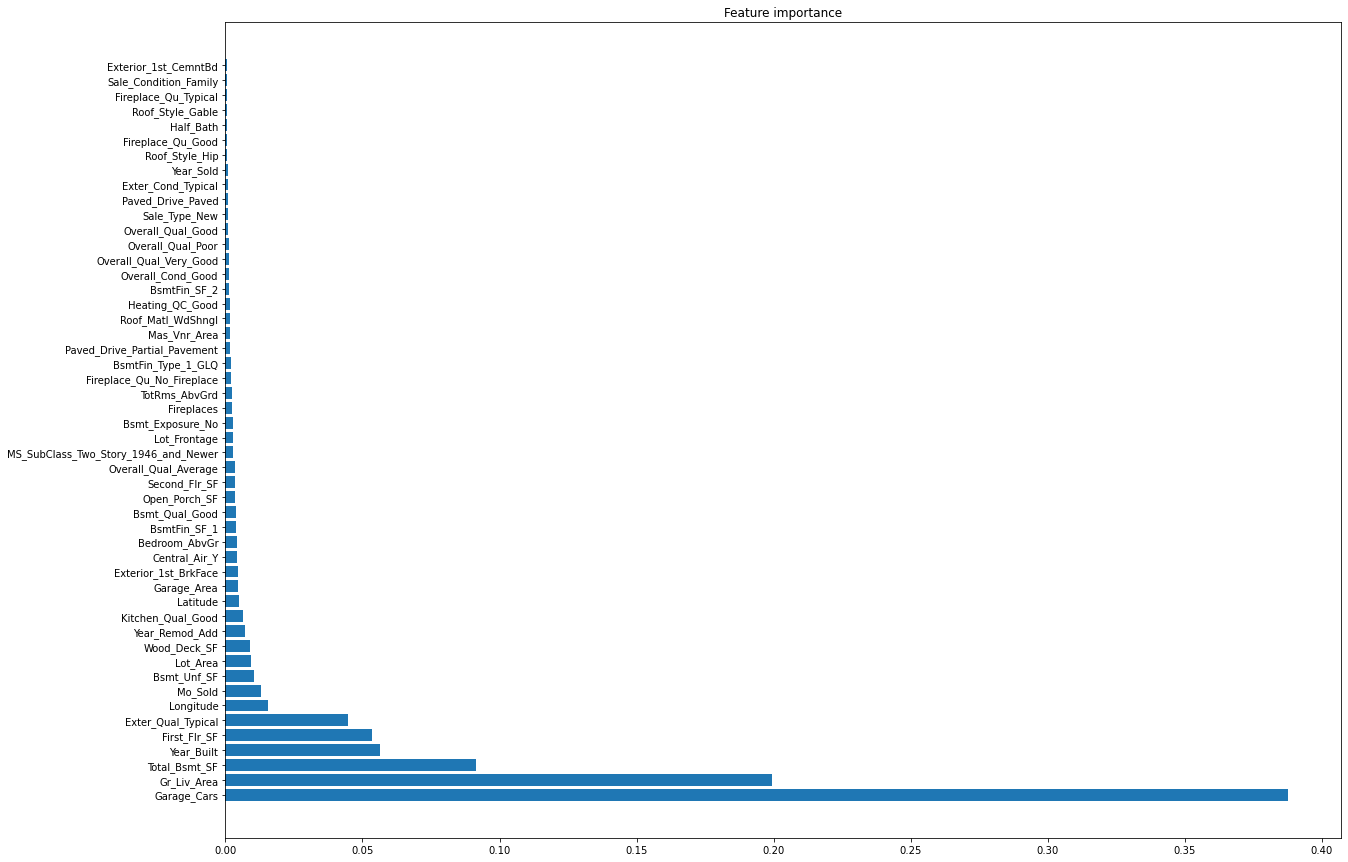

In [9]:

plot_importance(model, X_train.columns);

Vemos que lo mas importante es la cnatidad de estacionamientos para autos seguido por el año de construcción. Luego la importancia baja un 50% con respecto a la anterior hasta el cuarto atributo, luego se estabiliza un poco hasta caer fuertemente en el séptimo atributo con mas importancia. Los demas atributos son ya menores a ~0.025 y continuan bajando constantemente. 

In [16]:
# Conseguimos una base de datos entrenados sólo con los 10 atributos mas importantes
topTenFeatures = plot_importance(model, X_train.columns, number=10, plot=False)
# Creamos los nuevos sets de entrenamiento
X_train_depurated, X_test_depurated, y_train_depurated, y_test_depurated = train_test_split(refactoredDf.loc[:, topTenFeatures], refactoredDf['Sale_Price'], test_size=.33, random_state=19137)
X_train_depurated.columns

Index(['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Year_Built',
       'First_Flr_SF', 'Exter_Qual_Typical', 'Longitude', 'Mo_Sold',
       'Bsmt_Unf_SF', 'Lot_Area'],
      dtype='object')

## Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies
- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar
conjuntos de entrenamiento y validación.
- __Dentro de los datos de entrenamiento__ genere una búsqueda de grilla con `GridSearchCV`
utilizando los siguientes hiper parámetros:
  - __Máximo de atributos__: Evalúe todos los posibles atributos.
  - __Máximo de profundidad__: Entre 1 a 32.
  - __Validaciones cruzadas__: 5.
- Reporte la mejor combinación de hiper parámetros y su desempeño asociado. Compare
el desempeño en la muestra de validación con el modelo por defecto.


Consideramos que se crearin los conjuntos de entrenamiento en la sección anterior

In [17]:
searchParams = {
    'max_features': list(range(1,X_train_depurated.shape[1])),
    'max_depth': np.linspace(1, 32, 32)
}
bestModel = GridSearchCV(DecisionTreeRegressor(random_state=19137), searchParams, cv=5).fit(X_train_depurated, y_train_depurated)


['Garage_Cars',
 'Year_Built',
 'Gr_Liv_Area',
 'First_Flr_SF',
 'Total_Bsmt_SF',
 'Lot_Area',
 'Longitude',
 'Bsmt_Unf_SF',
 'Mo_Sold',
 'Exter_Qual_Typical']

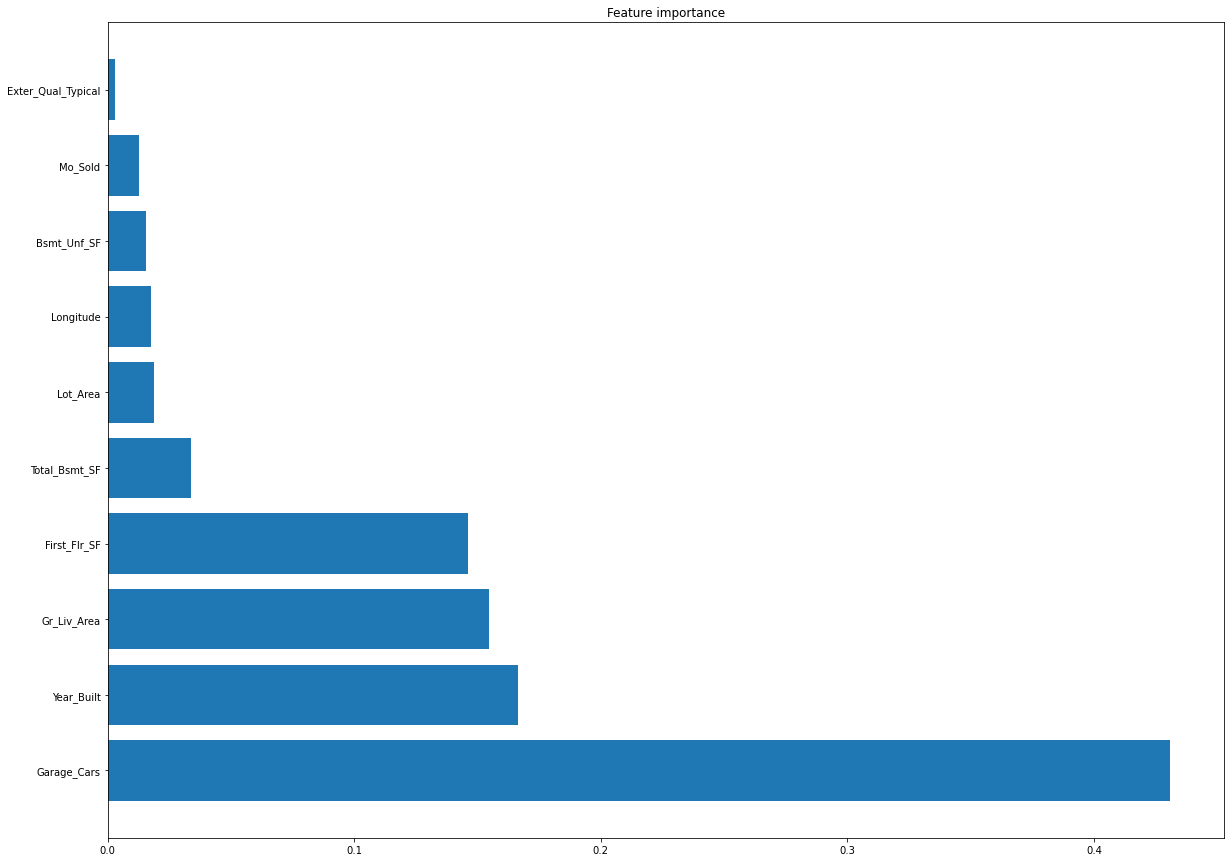

In [12]:
plot_importance(bestModel.best_estimator_, topTenFeatures, number=10)

Vemos que el orden de las importancias cambió, aumentando la importancia de `Year_Built`, `Lot_Area` y `First_Flr_SF`, asi como bajando considerablemente la de `Exter_Qual_Typical`.

In [18]:
# Generamos las predicciones
y_hat_depurated = bestModel.best_estimator_.predict(X_test_depurated)
# Analizamos las métricas
print(f'MSE: {mean_squared_error(y_test_depurated, y_hat_depurated)}')
print(f'MAE: {median_absolute_error(y_test_depurated, y_hat_depurated)}')
print(f'R2 Score: {r2_score(y_test_depurated, y_hat_depurated)}')

MSE: 1712560283.3989375
MAE: 16283.75
R2 Score: 0.7375350337402772


Podemos observar que el MSE baja un poco mas de ~12.500.000 pero el MAE aumenta ~280 puntos. Además el R2 Score aumenta pero en una cantidad minúscula de ~0.2%

## Pickling

Por [recomendación de scikit-learn](https://scikit-learn.org/stable/modules/model_persistence.html) se usará `joblib` como extensión de `pickle`

In [14]:
# Importamos la funció dump
from joblib import dump
# Guardamos los datos de entrenamiento y el modelo conseguido por gridsearch
dump({'test_data': (X_train_depurated, X_test_depurated, y_train_depurated, y_test_depurated), 'model': bestModel}, 'pickle.joblib')






['pickle.joblib']